In [10]:
from wrangle_zillow import wrangle_zillow
from prepare import describe_data

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
train, validate, test = wrangle_zillow()

Using cached CSV
The following 34 columns were dropped because they were missing more than 50.0% of data: 
['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear', 'airconditioningdesc', 'architecturalstyledesc', 'buildingclassdesc', 'storydesc', 'typeconstructiondesc']

0 rows were dropped because they were missing more than 50.0% of data
Yearbuilt converted to age. 



In [3]:
train.shape, validate.shape, test.shape

((21265, 19), (9114, 19), (7595, 19))

In [4]:
describe_data(train)

This dataframe has 21265 rows and 19 columns.

--------------------------------------
--------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21265 entries, 14230121 to 12260566
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   21265 non-null  float64
 1   bedroomcnt                    21265 non-null  float64
 2   calculatedfinishedsquarefeet  21265 non-null  float64
 3   fips                          21265 non-null  float64
 4   latitude                      21265 non-null  float64
 5   longitude                     21265 non-null  float64
 6   lotsizesquarefeet             21265 non-null  float64
 7   propertycountylandusecode     21265 non-null  object 
 8   rawcensustractandblock        21265 non-null  float64
 9   regionidcity                  21265 non-null  float64
 10  regionidzip                   21265 non-nul

In [5]:
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidzip,structuretaxvaluedollarcnt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,age
parcelid,,,,,,,,,,,,,,,,,,,
14230121,3.0,5.0,2152.0,6059.0,33804411.0,-117817996.0,7100.0,122,6.059076e+07,54970.0,97065.0,59980.0,79025.0,19045.0,1090.08,6.059076e+13,-0.007732,2017-04-05,54
12803766,2.0,3.0,1612.0,6037.0,33977044.0,-118062592.0,6868.0,0100,6.037501e+07,396556.0,96174.0,93170.0,138113.0,44943.0,1987.87,6.037501e+13,0.017445,2017-04-21,71
11089935,2.0,4.0,1420.0,6037.0,34248951.0,-118566603.0,7510.0,0101,6.037113e+07,12447.0,96346.0,67289.0,91705.0,24416.0,1237.90,6.037113e+13,-0.047621,2017-07-12,60
12084690,2.0,2.0,1370.0,6037.0,34127762.0,-118233137.0,6169.0,0100,6.037186e+07,12447.0,96046.0,43674.0,62288.0,18614.0,800.64,6.037186e+13,0.075405,2017-08-07,60
11189810,3.0,3.0,2203.0,6037.0,34598686.0,-118178794.0,7138.0,0100,6.037910e+07,40227.0,97329.0,183187.0,254060.0,70873.0,3926.34,6.037910e+13,-0.006346,2017-03-31,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11146732,3.0,4.0,2230.0,6037.0,34436929.0,-118402618.0,6595.0,0101,6.037911e+07,54311.0,96401.0,147200.0,471600.0,324400.0,6162.08,6.037911e+13,-0.018908,2017-05-31,48
14046505,3.0,5.0,2520.0,6059.0,33646063.0,-117959457.0,6000.0,122,6.059099e+07,25218.0,96964.0,71926.0,102686.0,30760.0,1386.94,6.059099e+13,0.055890,2017-02-22,48
11988627,2.0,3.0,1746.0,6037.0,34079422.0,-118366310.0,6548.0,0100,6.037195e+07,12447.0,96029.0,173346.0,842159.0,668813.0,10251.23,6.037195e+13,-0.316089,2017-05-22,91


In [6]:
import mitosheet
mitosheet.sheet(train, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-665ffe56-4413-4744-bf31-3b27fd4040aa", "code": {"imports…

Exercises

Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

Answer those questions through a mix of statistical tests and visualizations.

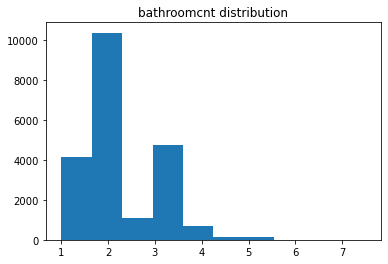

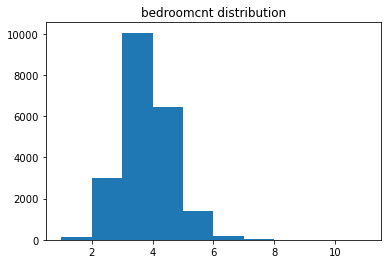

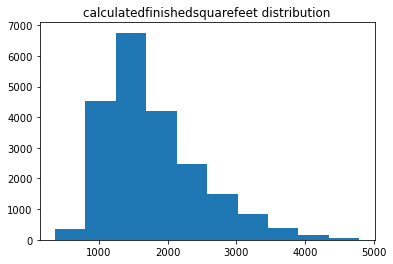

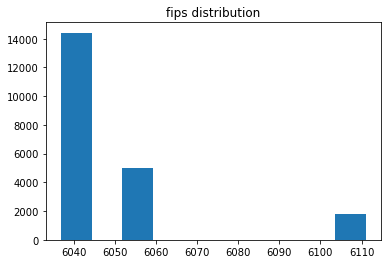

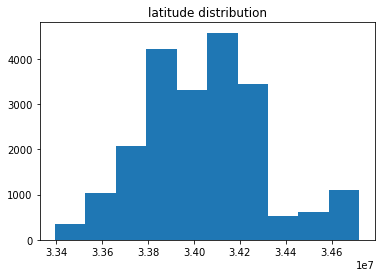

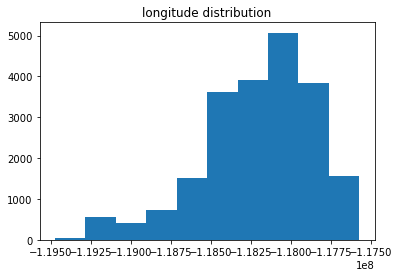

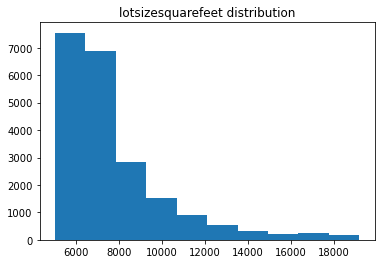

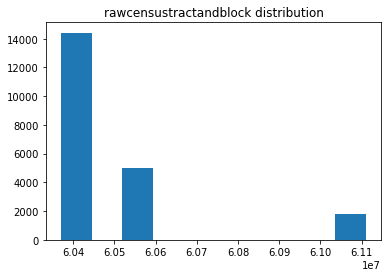

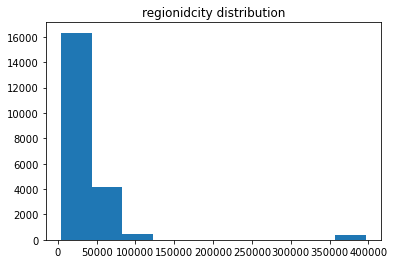

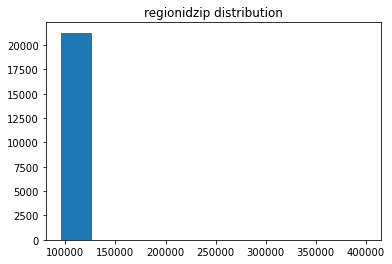

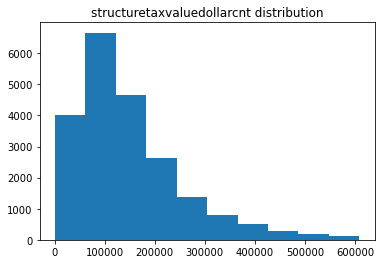

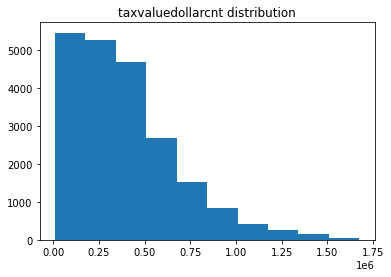

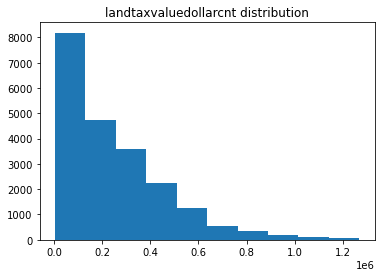

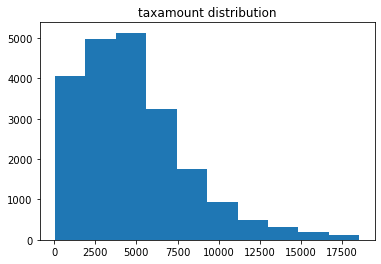

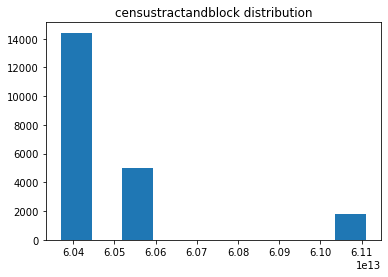

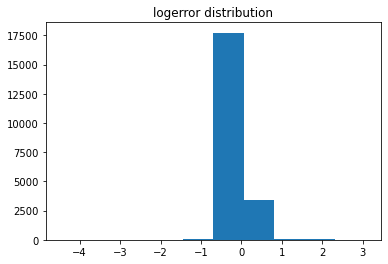

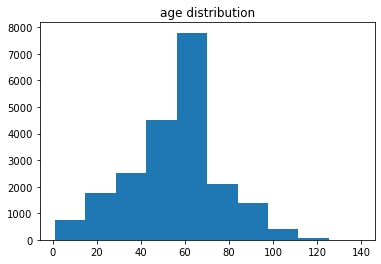

In [11]:
# distribution of the data
con_cols = [col for col in train.columns if (train[col].dtype == 'int64') | (train[col].dtype == 'float64')]

for col in con_cols:
    plt.hist(train[col])
    plt.title(f"{col} distribution")
    plt.show()

Takeaways:
FIPS and Rawcensustractandblock unsurprisingly follow similar distribution patterns, meaning that rawcensus can be considered reliable and accurate. Potentially a good source for either binning or clustering. 

All taxvallue counts are positively (right) skewed.
Region ID zip, as well as zip, may be thrown off by some outliers that are either mislabeled or oddly configured. Anything over 150,000 seems out of place.

In [ ]:
train

In [15]:
import mitosheet
mitosheet.sheet(train, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-df8d976f-10d5-4e9e-bd7e-201319aeff67", "code": {"imports…

In [ ]:
train

In [13]:
import mitosheet
mitosheet.sheet(train, view_df=True)

MitoWidget(analysis_data_json='{"analysisName": "UUID-ae4e8f91-322c-47a6-bece-c6e6bbac8cc4", "code": {"imports…

In [ ]:
from mitosheet import *; register_analysis('UUID-ae4e8f91-322c-47a6-bece-c6e6bbac8cc4')
    
# Sorted regionidcity in train in descending order
train = train.sort_values(by='regionidcity', ascending=False, na_position='last')

# Filtered regionidzip in train
train = train[train['regionidzip'] != 399675]

# Filtered regionidcity in train
train = train[~train['regionidcity'].isin([5534, 40227, 46298, 16764, 27110, 54311, 34278, 25218, 47568, 12773, 24812, 33252, 12292, 24832, 54722, 13150, 34543, 20008, 45457, 14542, 396054, 21412, 47019, 53636, 14634, 24245, 4406, 51239, 38032, 24174, 52650, 10608, 25459, 32380, 11626, 13693, 24384, 18874, 8384, 45602, 34780, 50749, 53571, 54053, 5465, 26531, 30908, 25974, 30187, 118225, 17150, 22827, 10734, 26483, 27491, 42150, 33836, 33612, 33837, 44116, 44833, 10241, 10774, 34636, 50677, 10723, 37015, 45398, 54212, 39308, 6021, 25458, 51861, 40081, 45888, 46314, 33840, 13091, 15554, 32923, 25953, 39306, 46080, 14111, 17597, 17686, 26964, 32616, 118694, 33311, 51617, 396556, 27183, 396551, 52842, 53655, 24435, 47762, 54299, 19177, 26965, 41673, 118914, 118994, 17882, 396550, 47695, 47547, 54352, 118217, 13716, 52835, 113576, 18098, 118895, 55753, 42967, 53027, 15237, 39076, 30267, 113412, 9840, 37688, 396053, 10389, 114828, 116042, 118878, 6395, 36502, 33727, 118875, 40110, 46178, 37086, 25468, 30399, 54970, 12520, 27103, 40009, 114834, 16389, 21778, 47198, 48424, 25271, 16961, 29189, 32753, 56780, 272578, 29712, 13311, 16677, 18875, 32927, 33312, 118880, 10815, 21395, 36078, 46098])]


Orange is a city located in Orange County, California. It is approximately 3 miles (4.8 kilometers) north of the county seat, Santa Ana. Orange is unusual in this region because many of the homes in its Old Town District were built before 1920. While many other cities in the region demolished such houses in the 1960s, Orange decided to preserve them. The small city of Villa Park is surrounded by the city of Orange. The population was 139,911 as of 2020.[6]

Orange is within the Greater Los Angeles Area.

Greater Los Angeles is the second-largest metropolitan region in the United States with a population of 18.7 million as of 2020,[6] encompassing five counties in southern California extending from Ventura County in the west to San Bernardino County and Riverside County in the east, with Los Angeles County in the center and Orange County to the southeast. According to the U.S. Census Bureau, the Los Angeles–Anaheim–Riverside combined statistical area covers 33,954 square miles (87,940 km2), making it the largest metropolitan region in the United States by land area.

There are three contiguous component metropolitan areas in Greater Los Angeles: the Inland Empire, which can be broadly defined as Riverside and San Bernardino counties; the Ventura/Oxnard metropolitan area (or Ventura County); and the Los Angeles metropolitan area (also known as Metropolitan Los Angeles or Metro LA)[8] consisting of Los Angeles and Orange counties only. The Census Bureau designates the latter as the Los Angeles–Long Beach–Anaheim metropolitan statistical area, the fifth largest metropolitan area in the western hemisphere and the second-largest metropolitan area in the United States, by population

In [ ]:
train = train[train['regionidzip'] != 399675]


Orange is a city located in Orange County, California. It is approximately 3 miles (4.8 kilometers) north of the county seat, Santa Ana. __Orange is unusual in this region because many of the homes in its Old Town District were built before 1920. While many other cities in the region demolished such houses in the 1960s, Orange decided to preserve them.__ The small city of Villa Park is surrounded by the city of Orange. The population was 139,911 as of 2020.[6]
Orange is within the Greater Los Angeles Area.
__Greater Los Angeles is the second-largest metropolitan region in the United States with a population of 18.7 million as of 2020,[6] encompassing five counties in southern California extending from Ventura County in the west to San Bernardino County and Riverside County in the east, with Los Angeles County in the center and Orange County to the southeast.__ According to the U.S. Census Bureau, the Los Angeles–Anaheim–Riverside combined statistical area covers 33,954 square miles (87,940 km2), making it __the largest metropolitan region in the United States by land area.__
There are three contiguous component metropolitan areas in Greater Los Angeles: the Inland Empire, which can be broadly defined as Riverside and San Bernardino counties; __the Ventura/Oxnard metropolitan area (or Ventura County);__ and the __Los Angeles metropolitan area (also known as Metropolitan Los Angeles or Metro LA)[8] consisting of Los Angeles and Orange counties only.__ The Census Bureau designates the latter as the Los Angeles–Long Beach–Anaheim metropolitan statistical area, the fifth largest metropolitan area in the western hemisphere and the second-largest metropolitan area in the United States, by population